In [1]:
from pymongo import MongoClient
from utils.sensors import SensorManagement
from utils.rules import RulesManagement
from utils.rules import Rules
from utils.museum import MuseumManagement
from pprint import pprint
import time
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['backend'] = "Qt4Agg"
sm = SensorManagement()
rm = RulesManagement()

####################### MUSEUM MANAGEMENT ################################

In [2]:
MUSEUM = 1
mm = MuseumManagement(MUSEUM)

In [ ]:
mm.addMuseum(1, "Museum 1")
mm.addMuseum(2, "Museum 2")

In [ ]:
mm.addRoom(1, "Lobby")
mm.addRoom(2, "Room 1")
mm.changeMuseum(2)
mm.addRoom(3, "Lobby")
mm.addRoom(4, "Room 1")

In [ ]:
mm.updateRoom(4, "Paintings Room")

In [ ]:
mm.changeMuseum(1)
mm.getRooms()

####################### GET SENSOR DATA ################################

In [187]:
sensor = "lab2"
start_date = 1598881560
end_date = 1614074220
params, results = sm.getSensorDataAll(sensor, start_date, end_date)

for row in range(len(results)):
    for i in range(len(results[row])):
        timestamp = results[row][i][1]
        dt_object = datetime.fromtimestamp(timestamp)
        results[row][i][1] = (dt_object.weekday()*24*60 + dt_object.hour*60 + dt_object.minute)/1440
        #results[row][i][1] = dt_object.hour + dt_object.minute/60


In [188]:
results[0][0][0] = 0
results[1][0][0] = 0
for i in range(1,len(results[0])-1):
    results[0][i][0] = 100 * abs(results[0][i+1][0] - results[0][i][0]) / results[0][i][0]
    results[1][i][0] = 100 * abs(results[1][i+1][0] - results[1][i][0]) / results[1][i][0]
results[0][len(results[0])-1][0] = 0
results[1][len(results[0])-1][0] = 0

In [189]:
len(results[0])

4118

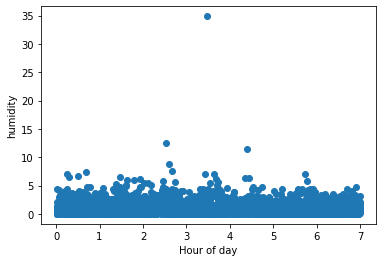

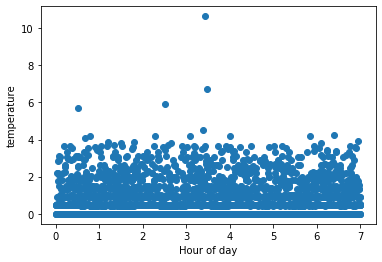

In [112]:
for i in range(len(params)):
    x,y = zip(*results[i])
    
    plt.scatter(y, x)
    #plt.xlabel("Sensor "+sensor)
    plt.xlabel("Hour of day")
    plt.ylabel(params[i])
    plt.show()
    

####################### GET RULES  ################################

In [ ]:
sensor = "123FF25"
rule_set = rm.getRules(sensor)
pprint (rule_set)

####################### ADD RULES ################################

In [ ]:
sensor = "123FF25"
rule = Rules({'param':'temperature', 'threshold':30, 'comparison':'gte'})
rm.addRule(sensor, rule.ex, 1, "temperature>=30")
rule = Rules({'param':'temperature', 'threshold':25, 'comparison':'lte'})
rm.addRule(sensor, rule.ex, 2, "temperature<=25")
rule = Rules({'param':'humidity', 'threshold':50, 'comparison':'gte'})
rm.addRule(sensor, rule.ex, 3, "humidity >= 50")

In [ ]:
rule = Rules()
rule.addSymbol("(")
rule.addRule({'param': 'temperature', 'threshold': 15, 'comparison': 'gte'})
rule.addOperator("and")
rule.addRule({'param': 'humidity', 'threshold': 5.6, 'comparison': 'gte'})
rule.addSymbol(")")
rm.addRule(sensor, rule.ex, 4, "temperature>=15 and humidity>=5.6")

####################### DELETE RULES ################################

In [ ]:
sensor = "123FF21"
ruleID=rule_set[2]["_id"]
rm.deleteRule(sensor, ruleID)

####################### UPDATE RULES ################################

In [ ]:
ruleID=rule_set[0]["_id"]
rule = Rules({'param':'temperature', 'threshold':15, 'comparison':'gte'})
rm.updateRule(sensor, ruleID, rule.ex)

In [ ]:
ruleID=rule_set[1]["_id"]
rule = Rules({'param':'humidity', 'threshold':6.8, 'comparison':'lte'})
rm.updateRule(sensor, ruleID, rule.ex)

####################### ADD FLUCTUATIONS ################################

In [ ]:
sensor = "123FF23"
# sensor, text, param, fluctuation, type=1(short-day) or 2(month), class =1..5
rm.addFluctuation(sensor, "temperature short class A ±2", "temperature", 2, 1, 1)  
rm.addFluctuation(sensor, "temperature short class A ±5", "temperature", 5, 1, 2)  
rm.addFluctuation(sensor, "temperature short class A ±10", "temperature", 10, 1, 3)  
rm.addFluctuation(sensor, "temperature short class A ±15", "temperature", 15, 1, 4)  
rm.addFluctuation(sensor, "humidity short class A ±5", "humidity", 5, 1, 1)
rm.addFluctuation(sensor, "humidity short class A ±10", "humidity", 10, 1, 2)  
rm.addFluctuation(sensor, "humidity short class A ±15", "humidity", 15, 1, 3)  
rm.addFluctuation(sensor, "humidity short class A ±20", "humidity", 20, 1, 4)  

In [ ]:
rm.addFluctuation(sensor, "temperature short class A ±2", "temperature", 2, 2, 1)  
rm.addFluctuation(sensor, "temperature short class A ±5", "temperature", 5, 2, 2)  
rm.addFluctuation(sensor, "temperature short class A ±10", "temperature", 10, 2, 3)  
rm.addFluctuation(sensor, "temperature short class A ±15", "temperature", 15, 2, 4)  
rm.addFluctuation(sensor, "humidity short class A ±5", "humidity", 5, 2, 1)
rm.addFluctuation(sensor, "humidity short class A ±10", "humidity", 10, 2, 2)  
rm.addFluctuation(sensor, "humidity short class A ±15", "humidity", 15, 2, 3)  
rm.addFluctuation(sensor, "humidity short class A ±20", "humidity", 20, 2, 4) 

####################### CHECK FLUCTUATIONS ################################

In [ ]:
days_back = 7
sensor = "123FF25"
cl = rm.checkShortFluctuationsSensor(sensor, days_back)

In [ ]:
now = int(time.time())
before1week = now - 3600*24*7
sensor = "123FF25"
cl = rm.checkSeasonalFluctuationsSensor(sensor, before1week, now)

####################### MANAGE ACTIONS ################################

In [ ]:
rm.addAction(1, "Call Supervisor", 1, "00306982501914")
rm.addAction(2, "SMS Supervisor", 2, "00306982501914")
rm.addAction(3, "Send email to supervisor", 3, "kmichalakis@gmail.com")
rm.addAction(4, "Send email to curator", 3, "kmichalakis@gmail.com")
rm.addAction(5, "Call emergency", 1, "00306982501314")

rm.getActions()

####################### CHECK RULES ################################

In [ ]:
now = int(time.time())
before1hour = now - 3600
before1day = now - 3600*24
before1week = now - 3600*24*7

In [ ]:
sensor = "123FF25"
actions = rm.checkRulesSensor(sensor, before1week, now)

In [ ]:
room = 2
actions = rm.checkRulesRoom(room, before1week, now)

In [ ]:
museum = 1
actions = rm.checkRulesMuseum(museum, before1day, now)

####################### MACHINE LEARNING ################################

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pickle

rng = np.random.RandomState(42)

In [201]:
clf = IsolationForest(random_state=rng, contamination=0.007, max_features=2)

In [210]:
table = 1

X_train = np.array(results[table][2487:])
X_test = np.array(results[table][:2486])


In [211]:
clf.fit(X_train)

/Users/KMICHALAKIS/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.007,
                max_features=2, max_samples='auto', n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7F95407F27C0, verbose=0,
                warm_start=False)

In [212]:
y_pred_train = clf.predict(X_train)
X_train_ok = []
X_train_nok = []
for i in range(len(X_train)):
    if y_pred_train[i]==1:
        X_train_ok.append(X_train[i])
    else:
        X_train_nok.append(X_train[i])
X_train_ok = np.array(X_train_ok)
X_train_nok = np.array(X_train_nok)

y_pred_test = clf.predict(X_test)
X_test_ok = []
X_test_nok = []
for i in range(len(X_test)):
    if y_pred_test[i]==1:
        X_test_ok.append(X_test[i])
    else:
        X_test_nok.append(X_test[i])
X_test_ok = np.array(X_test_ok)
X_test_nok = np.array(X_test_nok)

/Users/KMICHALAKIS/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/KMICHALAKIS/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


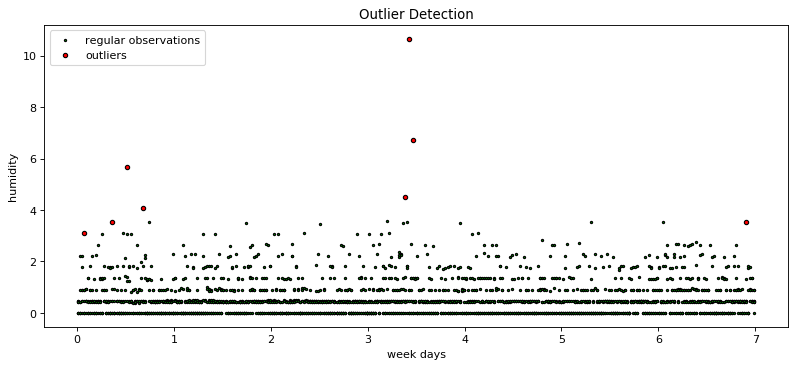

In [213]:
# plot the line, the samples, and the nearest vectors to the plane
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

plt.title("Outlier Detection")

#b1 = plt.scatter(X_train[:, 1], X_train[:, 0], c='white',
#                 s=0, edgecolor='k')
b2 = plt.scatter(X_test_ok[:, 1], X_test_ok[:, 0], c='green',
                 s=4, edgecolor='k')
#b3 = plt.scatter(X_train_nok[:, 1], X_train_nok[:, 0], c='pink',
#                 s=4, edgecolor='k')
b4 = plt.scatter(X_test_nok[:, 1], X_test_nok[:, 0], c='red',
                 s=15, edgecolor='k')
plt.axis('tight')
plt.legend([b2, b4],
           ["regular observations", "outliers"],
           loc="upper left")
plt.xlabel("week days")
plt.ylabel("humidity")
plt.show()

In [214]:
print (len(X_test_nok)/(len(X_test_nok)+len(X_test_ok))*100)

0.32180209171359614


In [215]:
print (len(X_train_nok)/(len(X_train_nok)+len(X_train_ok))*100)

0.7357449417535254
